In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import os

In [160]:
# Read the csv file into a pandas DataFrame
dfs = pd.read_csv('Output/lumid_5c.csv')
dfs.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot
0,6,Deamidation,3.50,5C,Lumab,21573,39360
1,9,Deamidation,3.30,5C,Lumab,21575,39360
2,12,Deamidation,4.30,5C,Lumab,21578,39360
3,24,Deamidation,3.64,5C,Lumab,95206,39404
4,24,Deamidation,3.99,5C,Lumab,95209,39408


In [161]:
dfs['timenew'] = [ 1 if x <= 13 else 0 for x in dfs['TIMEPOINT']]
# df1 = convert.loc[convert["CONDITION"] == "5C", :]

In [162]:
dfs.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot,timenew
0,6,Deamidation,3.50,5C,Lumab,21573,39360,1
1,9,Deamidation,3.30,5C,Lumab,21575,39360,1
2,12,Deamidation,4.30,5C,Lumab,21578,39360,1
3,24,Deamidation,3.64,5C,Lumab,95206,39404,0
4,24,Deamidation,3.99,5C,Lumab,95209,39408,0


In [163]:
target = dfs["timenew"]
target_names = ["higer", "lower"]

In [164]:
data = dfs.drop("timenew", axis=1)
feature_names = data.columns
data.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot
0,6,Deamidation,3.50,5C,Lumab,21573,39360
1,9,Deamidation,3.30,5C,Lumab,21575,39360
2,12,Deamidation,4.30,5C,Lumab,21578,39360
3,24,Deamidation,3.64,5C,Lumab,95206,39404
4,24,Deamidation,3.99,5C,Lumab,95209,39408


In [165]:
data = data.drop(columns=["NAME","CONDITION", "PRODUCT", "TIMEPOINT"], axis=1)
data.head()

,ENTRY,Sample-Number,Lot
0,3.50,21573,39360
1,3.30,21575,39360
2,4.30,21578,39360
3,3.64,95206,39404
4,3.99,95209,39408


In [166]:
data.head()

,ENTRY,Sample-Number,Lot
0,3.50,21573,39360
1,3.30,21575,39360
2,4.30,21578,39360
3,3.64,95206,39404
4,3.99,95209,39408


In [167]:
data.dtypes

ENTRY            float64
Sample-Number      int64
Lot                int64
dtype: object

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.811
k: 2, Train/Test Score: 0.904/0.755
k: 3, Train/Test Score: 0.866/0.623
k: 4, Train/Test Score: 0.815/0.623
k: 5, Train/Test Score: 0.803/0.604
k: 6, Train/Test Score: 0.777/0.623
k: 7, Train/Test Score: 0.758/0.623
k: 8, Train/Test Score: 0.752/0.604
k: 9, Train/Test Score: 0.726/0.585


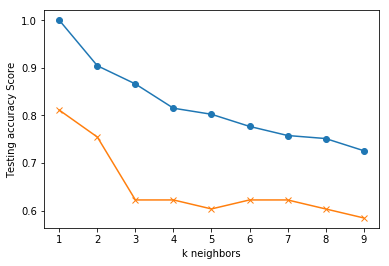

In [173]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

for k in range(1, 10, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 10, 1), train_scores, marker='o')
plt.plot(range(1, 10, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
# Save Figure
plt.savefig("images/Knn_Timepoint.png")
plt.show()



In [170]:
train_scores

[1.0,
 0.9044585987261147,
 0.8662420382165605,
 0.8152866242038217,
 0.802547770700637,
 0.7770700636942676,
 0.7579617834394905,
 0.7515923566878981,
 0.7261146496815286]

In [171]:
test_scores

[0.8113207547169812,
 0.7547169811320755,
 0.6226415094339622,
 0.6226415094339622,
 0.6037735849056604,
 0.6226415094339622,
 0.6226415094339622,
 0.6037735849056604,
 0.5849056603773585]

In [172]:
# Note that k: 1 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.811
